In [56]:
# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [57]:
# Importing the dataset
# ---------------------
dataset = pd.read_csv('Multiple-Linear-Dataset.csv')
# Assigning X and y datasets
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [58]:
dataset.shape

(50, 5)

In [59]:
dataset.head(15)

,Product_1,Product_2,Product_3,Location,Profit
0,165349.20,136897.80,471784.10,City_1,192261.83
1,162597.70,151377.59,443898.53,City_2,191792.06
2,153441.51,101145.55,407934.54,City_3,191050.39
3,144372.41,118671.85,383199.62,City_1,182901.99
4,142107.34,91391.77,366168.42,City_3,166187.94
5,131876.90,99814.71,362861.36,City_1,156991.12
6,134615.46,147198.87,127716.82,City_2,156122.51
7,130298.13,145530.06,323876.68,City_3,155752.60
8,120542.52,148718.95,311613.29,City_1,152211.77
9,123334.88,108679.17,304981.62,City_2,149759.96


In [32]:
print(X)

[[165349.2 136897.8 471784.1 'City_1']
 [162597.7 151377.59 443898.53 'City_2']
 [153441.51 101145.55 407934.54 'City_3']
 [144372.41 118671.85 383199.62 'City_1']
 [142107.34 91391.77 366168.42 'City_3']
 [131876.9 99814.71 362861.36 'City_1']
 [134615.46 147198.87 127716.82 'City_2']
 [130298.13 145530.06 323876.68 'City_3']
 [120542.52 148718.95 311613.29 'City_1']
 [123334.88 108679.17 304981.62 'City_2']
 [101913.08 110594.11 229160.95 'City_3']
 [100671.96 91790.61 249744.55 'City_2']
 [93863.75 127320.38 249839.44 'City_3']
 [91992.39 135495.07 252664.93 'City_2']
 [119943.24 156547.42 256512.92 'City_3']
 [114523.61 122616.84 261776.23 'City_1']
 [78013.11 121597.55 264346.06 'City_2']
 [94657.16 145077.58 282574.31 'City_1']
 [91749.16 114175.79 294919.57 'City_3']
 [86419.7 153514.11 0.0 'City_1']
 [76253.86 113867.3 298664.47 'City_2']
 [78389.47 153773.43 299737.29 'City_1']
 [73994.56 122782.75 303319.26 'City_3']
 [67532.53 105751.03 304768.73 'City_3']
 [77044.01 99281.3

In [60]:
# Encoding categorical data
# -------------------------
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [61]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [62]:
print(X)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [81]:
# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
multiple_linear = LinearRegression()
multiple_linear.fit(X_train,y_train)

LinearRegression()

In [83]:
# Predicting the Test set results
y_pred = multiple_linear.predict(X_test)

In [84]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X = np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     2.584
Date:                Sat, 16 Sep 2023   Prob (F-statistic):             0.0496
Time:                        00:02:33   Log-Likelihood:                -595.48
No. Observations:                  50   AIC:                             1201.
Df Residuals:                      45   BIC:                             1211.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.849e+04   2796.080     20.917      0.000    5.29e+04    6.41e+04
x1          5.849e+04   2796.080     20.917      0.000    5.29e+04    6.41e+04
x2          -8.13e+04   3.83e+04     -2.121      0.039   -1.59e+05   -4083.603
x3         -5.205e+04   3.83e+04     -1.358      0.181   -1.29e+05    2.52e+04
x4         -6.748e+04   3.83e+04     -1.760      0.085   -1.45e+05    9733.737
x5         -4.721e+04   3.83e+04     -1.232      0.225   -1.24e+05       3e+04
==============================================================================
Omnibus:                        1.208   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.481
Skew:                          -0.012   Prob(JB):                        0.786
Kurtosis:                       3.480   Cond. No.                     5.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.78e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.809
Date:                Sat, 16 Sep 2023   Prob (F-statistic):              0.159
Time:                        00:02:33   Log-Likelihood:                -597.87
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      46   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.762e+04   2869.394     20.082      0.000    5.18e+04    6.34e+04
x1          5.762e+04   2869.394     20.082      0.000    5.18e+04    6.34e+04
x2         -5.032e+04   3.98e+04     -1.266      0.212    -1.3e+05    2.97e+04
x3         -6.575e+04   3.98e+04     -1.654      0.105   -1.46e+05    1.43e+04
x4         -4.548e+04   3.98e+04     -1.144      0.259   -1.26e+05    3.45e+04
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.209
Skew:                          -0.073   Prob(JB):                        0.901
Kurtosis:                       3.281   Cond. No.                     4.88e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.2e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [86]:
X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.809
Date:                Sat, 16 Sep 2023   Prob (F-statistic):              0.159
Time:                        00:02:33   Log-Likelihood:                -597.87
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      46   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.152e+05   5738.788     20.082      0.000    1.04e+05    1.27e+05
x1         -5.032e+04   3.98e+04     -1.266      0.212    -1.3e+05    2.97e+04
x2         -6.575e+04   3.98e+04     -1.654      0.105   -1.46e+05    1.43e+04
x3         -4.548e+04   3.98e+04     -1.144      0.259   -1.26e+05    3.45e+04
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.209
Skew:                          -0.073   Prob(JB):                        0.901
Kurtosis:                       3.281   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.299
Date:                Sat, 16 Sep 2023   Prob (F-statistic):              0.283
Time:                        00:02:34   Log-Likelihood:                -599.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.139e+05   5782.556     19.693      0.000    1.02e+05    1.26e+05
x1         -4.895e+04   4.05e+04     -1.209      0.233    -1.3e+05    3.25e+04
x2         -4.411e+04   4.05e+04     -1.090      0.281   -1.26e+05    3.73e+04
==============================================================================
Omnibus:                        0.323   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.039
Skew:                          -0.058   Prob(JB):                        0.981
Kurtosis:                       3.072   Cond. No.                         7.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.404
Date:                Sat, 16 Sep 2023   Prob (F-statistic):              0.242
Time:                        00:02:34   Log-Likelihood:                -599.93
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.13e+05   5734.430     19.701      0.000    1.01e+05    1.25e+05
x1         -4.805e+04   4.05e+04     -1.185      0.242    -1.3e+05    3.35e+04
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.007
Skew:                          -0.015   Prob(JB):                        0.996
Kurtosis:                       2.949   Cond. No.                         7.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Two input features (Product_1 and Product_3); 1 output represents the estimated profit based on these two features**

In [89]:
#preparing datasets as per instructions
X = dataset.iloc[:, [0, 2]].values
y = dataset.iloc[:, 4].values
#X = dataset[['Product_1', 'Product_3']]
#y = dataset['Profit']

In [90]:
# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
# Fitting Multiple Linear Regression to the Training set
multiple_linear2 = LinearRegression()
multiple_linear2.fit(X_train, y_train)

LinearRegression()

In [92]:
# Predicting results
y_pred = multiple_linear2.predict(X_test)

In [93]:
# Evaluating our model
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, y_pred)
print(error)

6886.594588246504


**Plotting the Graph for features vs estimated profit**

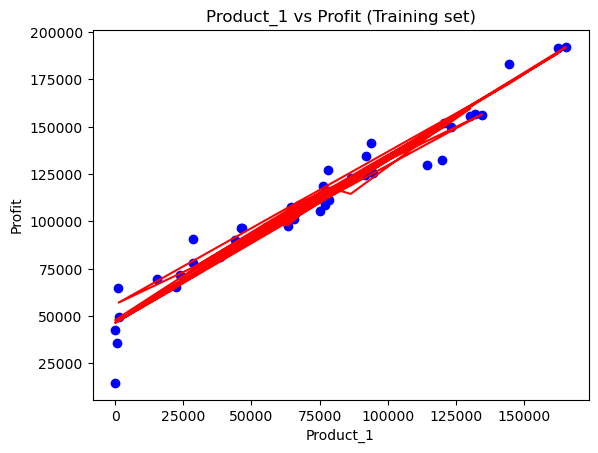

In [94]:
# Plotting the Training set using Product_1
plt.scatter(X_train[:, 0], y_train, color = 'blue')
plt.plot(X_train[:, 0], multiple_linear2.predict(X_train), color = 'red')
plt.title('Product_1 vs Profit (Training set)')
plt.xlabel('Product_1')
plt.ylabel('Profit')
plt.show()

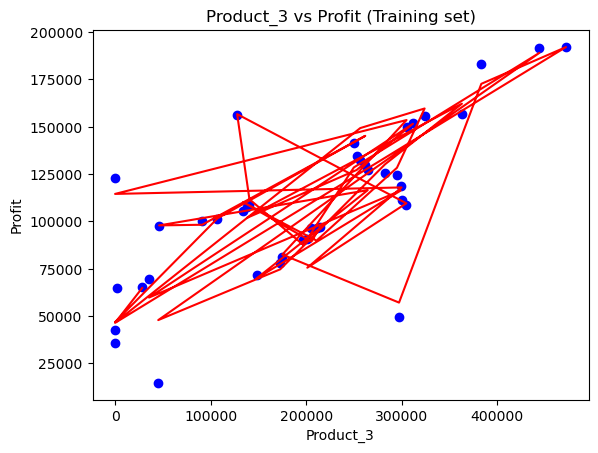

In [96]:
# Plotting the Training set using Product_3
plt.scatter(X_train[:, 1], y_train, color = 'blue')
plt.plot(X_train[:, 1], multiple_linear2.predict(X_train), color = 'red')
plt.title('Product_3 vs Profit (Training set)')
plt.xlabel('Product_3')
plt.ylabel('Profit')
plt.show()

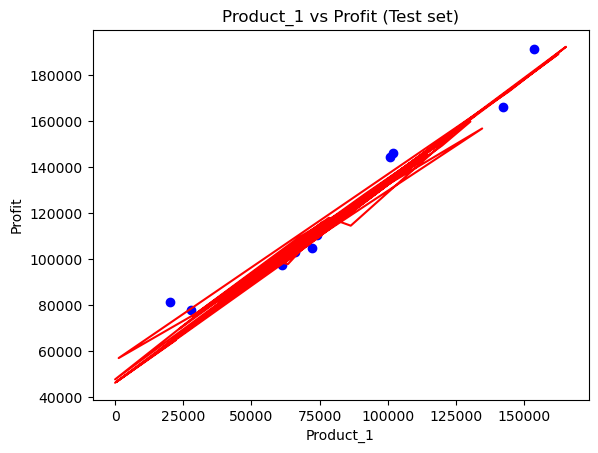

In [98]:
# Plotting the Test set using Product_1
plt.scatter(X_test[:, 0], y_test, color = 'blue')
plt.plot(X_train[:, 0], multiple_linear2.predict(X_train), color = 'red')
plt.title('Product_1 vs Profit (Test set)')
plt.xlabel('Product_1')
plt.ylabel('Profit')
plt.show()

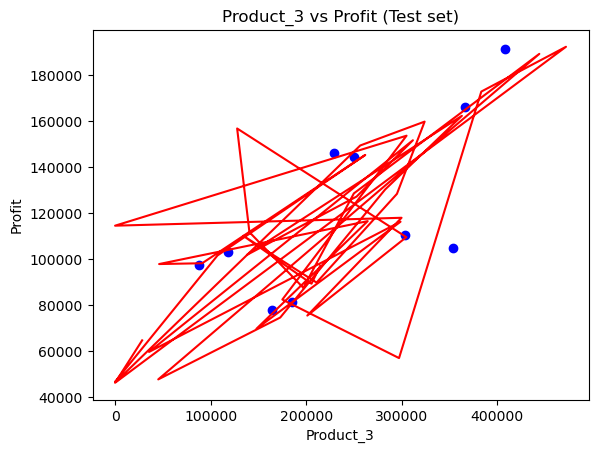

In [99]:
# Plotting the Test set using Product_3
plt.scatter(X_test[:, 1], y_test, color = 'blue')
plt.plot(X_train[:, 1], multiple_linear2.predict(X_train), color = 'red')
plt.title('Product_3 vs Profit (Test set)')
plt.xlabel('Product_3')
plt.ylabel('Profit')
plt.show()